# COVID-19 - Revisiting Pneumonia Detection
### Release 1.0 - May, 2020
### Paulo Breviglieri

## Foreword

<p style="text-align: justify">The 2020 COVID-19 outbreak has prompted for increased research on several aspects of the disease. The <b>diagnosis of pneumonia</b> (one of the primary complications resulting from COVID-19) through imaging techniques and the particular use of artificial intelligence as an ancilary tool has gained special traction as the disease progresses.</p>
<p style="text-align: justify">This notebook is inspired by the current gravity of the COVID-19 pandemic. It is though not intended to serve as a medical reference in any sense. Instead, the main purpose of this exercise is to revisit traditional machine learning-based image processing and explore the level of confidence obtained in chest x-ray analysis as a pneumonia diagnosis instrument.</p>
<p style="text-align: justify"><b>Warning</b>: computer vision machine learning exercises are time and resource consuming. This work was indeed developed in GPU-based runtime environments provided by Kaggle and Google Colab for code execution. Unless you have a very powerful machine to execute your code on a local host, consider a similar cloud-based approach.</p>
<p style="text-align: justify">Logic enhancement and code forking are welcome and encouraged by the author, provided that this work is properly referenced. Thank you.</p>

## 1. Introduction

### 1.1. The COVID-19 pandemic

<p style="text-align: justify">Corona Virus Disease 2019 (COVID-19) severely affected many countries globally over the  first half of 2020. COVID-19 is an infectious disease caused by the most recently discovered coronavirus, formally denominated 'Severe Acute Respiratory Syndrome Coronavirus 2' (SARS-CoV-2), unknown before the outbreak observed in Wuhan, China.</p>
<p style="text-align: justify">COVID-19 is contagious in humans. SARS-CoV-2 primarily spreads among individuals through physical contact and via respiratory droplets originated from coughing or sneezing. The virus seizes human cells by binding to the angiotensin receptor converting enzyme 2 (ACE2).</p>
<p style="text-align: justify">In humans, corona viruses are known to cause respiratory infections ranging from a common cold to more severe diseases such as the Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). In the case of COVID-19, usual symptoms include fever, cough, fatigue, shortness of breath, smell and taste disturbs.</p>

<img src="https://i.imgur.com/uc2IpZ3.png" width="250" height="250">
<p></p>
<p style="text-align: center">Illustration of a SARS-CoV-2 virion <a href="https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2">(<em>Wikipedia</em>)</a></p>

<p style="text-align: justify">SARS-CoV-2 may spread through respiratory airways reaching the lungs, where it may lead to the development of severe viral pneumonia, identified as the final death cause in most lethal cases of COVID-19. Lung monitoring for pneumonia has gained greater importance over the COVID-19 outbreak.</p>

### 1.2. Pneumonia

<p style="text-align: justify">Per <a href="https://en.wikipedia.org/wiki/Pneumonia">Wikipedia</a>,</p>
<p style="text-align: center; padding-left: 5em; padding-right: 5em">"<em><b>Pneumonia</b> is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli. Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. (...) Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases. Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), sickle cell disease, asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. <b>Chest X-ray</b>, blood tests, and culture of the sputum may help confirm the diagnosis. (...) Each year, pneumonia affects about 450 million people globally (7% of the population) and results in about 4 million deaths.</em>"</p>
<p style="text-align: justify">Along with physical examination, <b>imaging diagnosis</b> plays a central role in the detection of pneumonia. <b>Chest radiographs</b> are frequently used in diagnosis procedures and represent a fast, cost-effective alternative to map the nature, features and extension of lung inflammations. X-ray radiograph image <b>opacity areas</b> are commonly correlated to pneumonia affected regions.</p>

<img src="https://i.imgur.com/WkFqurM.png" width="700" height="100">

<p style="text-align: center">Normal (left) and abnormal (right) chest radiographs - Increased opacity suggests a pneumonia occurrence</p>

<p style="text-align: justify">The identification of opacities in chest x-ray images is sometimes challenging, even for experienced practitioners. Artificial intelligence and computer vision techniques have been extensively used over the past few years as ancillary tools in pneumonia diagnosis.</p>

## 2. Objectives of this deep learning exercise

<p style="text-align: justify">The primary goal of this exercise is educational. The role of computer vision  deep learning techniques - <b>Convolutional Neural Networks</b> (CNNs), in particular - is assessed in detail herein. Special attention is given to particular aspects of a CNN-based solution to chest radiograph opacity interpretation, including the choice and tuning of critical <b>hyperparameters</b> and the relevance of dataset <b>augmentation</b> procedures.</p>

## 3. The dataset

<p style="text-align: justify">The dataset chosen for this deep learning exercise is a modified version of that submitted by Paul Mooney at <a href="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia">Kaggle</a>, 'Chest X-Ray Images (Pneumonia)'. Per the dataset author, "<em>(...) Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. (...)</em></p>
<p style="text-align: justify">The original dataset contains 5,863 observations, split into training (1,341 normal cases, 3,875 pneumonia cases), validation (8 normal cases, 8 pneumonia cases) and testing (234 normal cases, 390 pneumonia cases) folders.</p>
<p style="text-align: justify">The modified <a href="https://www.kaggle.com/pcbreviglieri/pneumonia-xray-images">dataset</a> contains the very same 5,863 observations, where a more balanced split between training  and validation images is proposed:</p>
<ul>
    <li style="text-align: justify">Training observations: 4,192 (1,082 normal cases, 3,110 lung opacity cases);</li>
    <li style="text-align: justify">Validation observations: 1,040 (267 normal cases, 773 lung opacity cases);</li>
    <li style="text-align: justify">Testing observations: 624 (234 normal cases, 390 lung opacity cases).</li>
</ul>
<p style="text-align: justify">This dataset is particularly interesting as:</p>
<ul>
    <li style="text-align: justify">it addresses a <b>specific segment</b> (<b>children</b>) critically susceptible to pneumonia;</li>
    <li style="text-align: justify">the number of observations, though not small, is also not large, allowing for the exploration of <b>augmentation</b> techniques;</li>
    <li style="text-align: justify">unlike other similar datasets, it contains images of several, non-standardized resolutions.</li>
</ul>

## 4. Initial setup

### 4.1. Importing required libraries

<p style="text-align: justify">Along with traditional libraries imported for tensor manipulation, mathematical operations and graphics, one scikit-learn module (confusion_matrix for performance metric assessment) and specific <b>Keras image preprocessing</b> (<a href="https://keras.io/api/preprocessing/image/#imagedatagenerator-class">ImageDataGenerator</a>) and <b>deep learning</b> objects (<a href="https://keras.io/api/models/sequential/">Sequential</a>, <a href="https://keras.io/api/layers/convolution_layers/convolution2d/">Conv2D</a>, <a href="https://keras.io/api/layers/pooling_layers/max_pooling2d/">MaxPooling2D</a>, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten">Flatten</a>, <a href="https://keras.io/api/layers/core_layers/dense/">Dense</a>) are used in this exercise.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from datetime import datetime

start_time = datetime.now()

Using TensorFlow backend.


### 4.2. Critical hyperparameters

<p style="text-align: justify">Machine learning hyperparameters are parameters whose value is set before the learning process starts. Several rounds of this exercise showed that specific hyperparameters play an important role when it comes to final prediction accuracy and execution runtime, reason why they have been segregated in the code session below:</p>
<ul>
    <li style="text-align: justify">'<b>hyper_dimension</b>': target image width and length in pixels considered when original images need to be rescaled for processing;</li>
    <li style="text-align: justify">'<b>hyper_epochs</b>': number of epochs (leaning iterations through which the whole dataset is exposed to the machine for weight updates);</li>
    <li style="text-align: justify">'<b>hyper_batch_size</b>': size of image batches;</li>
    <li style="text-align: justify">'<b>hyper_feature_maps</b>': reference number of feature maps generated by convolutional layers;</li>
    <li style="text-align: justify">'<b>hyper_channels</b>' and 'hyper_mode': number of channels utilized in the learning process. For colored RGB images, hyper_channels = 3 and hyper_mode = 'rgb', yet for grayscale images hyper_channels = 1 and hyper_mode = 'grayscale'.</li>
</ul>
<p style="text-align: justify">Specific considerations on hyperparameters are provided through the exercise.</p>   

In [2]:
hyper_dimension = 500
hyper_epochs = 100
hyper_batch_size = 16
hyper_feature_maps = 32
hyper_channels = 1
hyper_mode = 'grayscale'

## 5. Deep Learning - Convolutional Neural Network

### 5.1. Creating and compiling the deep learning model

<p style="text-align: justify">In this exercise a traditional convolutional neural network aimed at image processing and interpretation is adopted. The architecture, a Keras sequential model graphically depicted below, comprises:</p>
<ol>
    <li style="text-align: justify"><b>Three pairs of convolution / pooling layers</b>: first and second produce 32 feature maps processed by subsequent 2x2 pooling engines generating 32 pooled maps, while the third produces 64 feature maps also processed by a subsequent 2x2 pooling engine generating a 64 pooled map. Convolution is performed with 3x3xk kernels, where k = 1 for grayscale images and k = 3 for RGB images. The input shape is a 500x500 pixels image (1 or 3 channels, as described above). 'ReLU' (Rectifier Linear Unit) is the activation function of choice;</li>
    <li style="text-align: justify">A <b>flattening layer</b>, responsible to provide the subsequent artificial neural network (ANN) with an flaattened, unidimensional tensor with the output of the last pooling layer;</li>
    <li style="text-align: justify">A <b>full connection pair of layers</b> with 64 and 1 neuron, respectively, responsible to perform binary classification ('normal' or 'pneumonia').</li>
</ol>

<img src="https://i.imgur.com/TU2LBlg.png" width="900" height="100">

<p style="text-align: justify">The model is compiled using '<a href="https://keras.io/api/optimizers/adam/"><b>adam</b></a>' (stochastic gradient descent method based on adaptive estimation of first-order and second-order moments) as the <b>optimization function</b>. Since this is a classification problem ('normal' versus 'pneumonia' cases), '<a href="https://keras.io/api/losses/probabilistic_losses/#binary_crossentropy-function"><b>binary_crossentropy</b></a>' is elected as the loss function. Performance will be assessed via the '<b>accuracy</b>' metric.</p>   

In [3]:
# Initializing the CNN
classifier = Sequential()

# Convolution & pooling - First convolution layer
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Second convolution layer (same as first layer)
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Third convolution layer
classifier.add(Conv2D(hyper_feature_maps * 2, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = hyper_feature_maps * 2, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])


### 5.2. Creating training and validation sets through image flowing with augmentation

<p style="text-align: justify"><b>Augmentation</b> is an important tool to mitigate the risk of <b>overfitting</b> in machine learning exercises. When it comes to images, augmentation techniques provide modified versions of the original images through a series of specific procedures. As the chosen dataset is not as large as desired for an image processing experience, augmentation can fill this blank and help address the risk of overfitting.</p>
<p style="text-align: justify">Keras '<b>ImageDataGenerator</b>' object (class) is used in this exercise as the primary tool to generate augmented training and validation image sets. Two instances of this object are created:</p>
<ul>
    <li style="text-align: justify">'<b>train_gen</b>' will be utilized to generate the training set. As the original images stored in folders (more ahead) correspond to 500x500 pixel matrices of real values ranging from 0 to 255, rescaling is performed through the 'rescale' parameter. Also, augmentation is achieved with some image shearing, zooming and vertical flips.</li>
    <li style="text-align: justify">'<b>val_gen</b>' will be utilized to generate the validation set. Only rescaling is performed in this case, as we intend to validate the learning process making use of pure images with no manipulation.</li>
</ul>
<p style="text-align: justify">The '<a href="https://keras.io/api/preprocessing/image/#flowfromdirectory-method"><b>flow_from_directory</b></a>' method allows for pulling from specific folders images for training and validation, resizing them, grouping them in batches and specifying the machine objective (a binary classification, in this case) and the color mode of choice. The use of 'flow_from_directory' assumes that the data is properly stored in appropriate folders with a pre-determined structure:</p>
<ul>
    <li style="text-align: justify">train</li>
    <ul>
        <li style="text-align: justify">normal</li>
        <li style="text-align: justify">pneumonia</li>
    </ul>
    <li style="text-align: justify">val</li>
    <ul>
        <li style="text-align: justify">normal</li>
        <li style="text-align: justify">pneumonia</li>
    </ul>
</ul>

In [4]:
# Creating training and validation image flows

train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory('../input/pneumonia-xray-images/train',
                                          target_size = (hyper_dimension,
                                                         hyper_dimension),
                                          batch_size = hyper_batch_size,
                                          class_mode = 'binary',
                                          color_mode = hyper_mode)

val_set = val_gen.flow_from_directory('../input/pneumonia-xray-images/val',
                                      target_size = (hyper_dimension,
                                                     hyper_dimension),
                                      batch_size = hyper_batch_size,
                                      class_mode = 'binary',
                                      color_mode = hyper_mode)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


### 5.3. Image visualization prior to fitting

<p style="text-align: justify">Once training and testing sets are generated, it is important to <b>investigate how images look like</b>.</p>
<p style="text-align: justify">Understanding the structure of the training and validation sets is important to manipulate them. Let's take the training set as an example.</p>
<ul>
    <li style="text-align: justify">'<b>train_set[0]</b>' corresponds to the first set of image batches flowed from the source folder;</li>
    <li style="text-align: justify">'<b>train_set[0][0]</b>' coresponds to the first batch of 16 images included in the first set of batches;</li>
    <li style="text-align: justify">Each of the 16 images in this first batch can be accessed via the 'array_to_img' method and properly plotted.</li>
</ul>
<p style="text-align: justify">The analysis of the first batch in the training set shows that augmentation has been successfully performed. Some images have been slightly shared, zoomed in and/or flipped vertically. Also, it is evident that we are now dealing with grayscale images, as expected.</p>

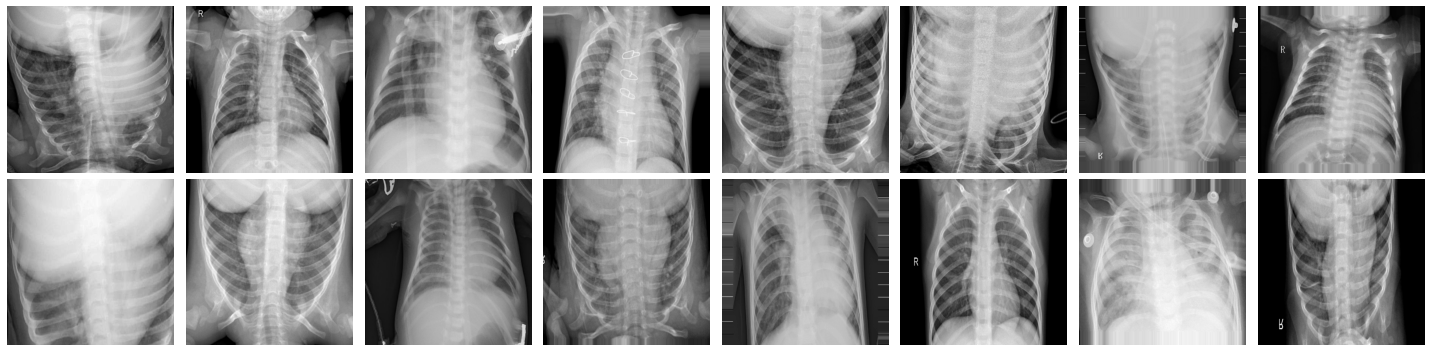

In [5]:
# Visualizing images in the first training set batch 

image_batch = train_set[0][0]

plt.figure(figsize=(20,5))
for i in range(len(image_batch)):
    plt.subplot(2,8,i+1)
    pil_img = array_to_img(image_batch[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

### 5.4. Fitting the model

<p style="text-align: justify">As we are dealing with a relatively large dataset and augmentation has been implemented, '<b>fit_generator</b>' is our method of choice for fitting purposes. (<b>Note</b>: 'fit' also supports data augmentation from TensorFlow 2.2.0, so it could also be used in this exercise. As the code may be forked by coders not equipped with TF 2.2.0, the original method, 'fit_generator', has been maintained herein.)</p>
<p style="text-align: justify">The model will be trained in <b>100 epochs</b>. Comments on this choice will be provided ahead.</p>

In [6]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

Epoch 1/100
262/262 [==============================] - 223s 852ms/step - loss: 0.4320 - accuracy: 0.8030 - val_loss: 0.0853 - val_accuracy: 0.8846
Epoch 2/100
262/262 [==============================] - 207s 792ms/step - loss: 0.2575 - accuracy: 0.8941 - val_loss: 0.0297 - val_accuracy: 0.9135
Epoch 3/100
262/262 [==============================] - 208s 793ms/step - loss: 0.2130 - accuracy: 0.9077 - val_loss: 0.1284 - val_accuracy: 0.9288
Epoch 4/100
262/262 [==============================] - 207s 789ms/step - loss: 0.1957 - accuracy: 0.9198 - val_loss: 0.1782 - val_accuracy: 0.9423
Epoch 5/100
262/262 [==============================] - 209s 800ms/step - loss: 0.1839 - accuracy: 0.9311 - val_loss: 0.2325 - val_accuracy: 0.9423
Epoch 6/100
262/262 [==============================] - 210s 800ms/step - loss: 0.1696 - accuracy: 0.9361 - val_loss: 0.0780 - val_accuracy: 0.9279
Epoch 7/100
262/262 [==============================] - 208s 795ms/step - loss: 0.1516 - accuracy: 0.9420 - val_loss: 0

### 5.5. Predicting pneumonia

<p style="text-align: justify">The <b>test set</b> must be generated so that predictions on it can be made. The same 'flow_from_directory' method is applied, as images are segregated in different folders for different diagnosis ('normal' and 'pneumonia').</p>
<p style="text-align: justify">As predictions will be confronted with the actual test image labels for performance assessment, it is assured that <b>no shuffling</b> will be executed. Also, test images will be flown from the corresponding folders individually (batches of <b>1 image each</b>).</p>
<p style="text-align: justify">The model will provide for each image a scalar output within the range [0,1] corresponding to the probability a given image represents a pneumonia case. In other words, the higher the output, the higher the probability of a pneumonia occurrence.</p>
<p style="text-align: justify">As we intend to quantify true positive, true negative, false positive and false negative cases and visualize them in a confusion matrix, scalar results will be segregated in two subsets (<b>below and above the 0.5 threshold</b>), corresponding to 'normal' and 'pneumonia' diagnosis, respectively.</p>

In [7]:
# Creating test image flow

test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory('../input/pneumonia-xray-images/test',
                                        target_size = (hyper_dimension,
                                                       hyper_dimension),
                                        batch_size = 1,
                                        class_mode = None,
                                        color_mode = hyper_mode,
                                        shuffle=False)

# Making predictions

predictions = classifier.predict_generator(test_set)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 624 images belonging to 2 classes.


## 6. Results

<p style="text-align: justify">The segregation described in Section 5.5 allows for constructing a confusion matrix and calculating the overall prediction accuracy from it.</p>

In [8]:
# Confusion matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,195,39
Actual Pneumonia,6,384


## 7. Discussion and Final Remarks

<p style="text-align: justify">Results show that very <b>low losses</b> and <b>high accuracies</b> (exceeding 96% in validation) are obtained with a traditional CNN approach, without any refinement based, for example, on the use of pre-trained image classification models.</p>
<p style="text-align: justify">In addition, when we deal with medical diagnosis, a false positive (i.e. prediciting illness when the patient is healthy) is <b>less critical</b> than a false negative (predicting healthiness when the patient is sick). The number of false negatives obtained with the CNN presented here is extremely low, which positions the machine developed here as a reliable ancillary tool for pneumonia detection.</p>
<p style="text-align: justify">Specific considerations on the model and the hyperparameters must be made:</p>
<ol>
    <li style="text-align: justify">As mentioned above, the approach presented here is very traditional. The CNN architecture adopted here follows those Yann LeCun (recognized as founding father of convolutional networks and their use in computer vision) promoted in the 1990s for image classification. <b>No pre-trained model</b> was used here, and their employment could be taken as a suggestion for further improvements;</li>
    <li style="text-align: justify">The model was trained several times with a <b>variety of hyperparameter combinations</b>. The final version depicted here was the one through which the best results were obtained. On hyperparameters:</li>
    <ul>
        <li style="text-align: justify">Tested numbers of epochs were 10, 25, 50 and 100. Reasonable results (low losses and high accuracy on both validation AND testing) were achieved only with <b>50 or 100 epochs</b>. The final training was performed over 100 epochs;</li>
        <li style="text-align: justify">The model was fed with 400x400, 500x500 and 600x600 pixels images. Best performance was achieved with <b>500x500</b> resized input images;</li>
        <li style="text-align: justify">Batches of <b>16 images</b> proved to be the best choice over 8, 32 and 64 image alternatives. It must be emphasized though that much faster runtimes could be achieved with the use of TPUs, case in which larger batches would be more appropriate. There is an ongoing discussion on how TPUs handle floating scalars and how large batches should be to extract from TPUs their maximum performance. As this exercise made use of GPUs only, this topic was not explored.</li>
        <li style="text-align: justify">Finally, the model was trained with both 3-channel (RBG) and 1-channel (grayscale) versions of input images (which are originally 3-channel samples). As a higher number of channels carries in theory a larger amount of information, it was initially expected that 3-channel image trainings would lead to better machines. However, this was not observed - <b>grayscale</b>-based exercises led to hiher accuracies and lower losses. Further investigation could be made, but in a first assessment of such results, considering that in pneumonia detection cases we look for <b>opacities</b> in the lungs, those might be more evidenced in grayscale samples than in colored ones. For now this is just an assumption demanding further analysis.</li>
    </ul>
</ol>

In [9]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2020-05-23 22:45:23.490633
End time 2020-05-24 04:20:25.079897
Time elapsed 5:35:01.589264
